# Hashtable Analysis

In writing a hashtable with doubling, I wanted to test that my understanding of amortized complexity was correct, and that the table was functioning as intended. To do this I captured three datasets into a single file. I measured  how fast the hashtable could perform insertions, retrievals and deletions of $n$ elements, where $n$ doubled for each measurement. The resolution of this measurement was in milliseconds, so I started with $2^{14}$ elements and finished with $2^{28}$. Any fewer and the whole batch of operations took less than one millisecond – already a good sign for the performance of this library!

In [40]:
import re
from numpy import array


def next_number(file):
    return int(re.search("\d+", next(f)).group())


data = []


with open("data.txt") as f:
    while f:
        try:
            number_elements = next_number(f)
            insert_ms = next_number(f)
            retrieve_ms = next_number(f)
            delete_ms = next_number(f)
            data.append((number_elements, insert_ms, retrieve_ms, delete_ms))
        except StopIteration:
            break


sizes, insert_times, retrieve_times, delete_times = map(array, zip(*data))

# Linear Relationships

In the following three graphs I demonstrate that the time taken to insert, retrieve and delete all the elements in the hashtable is a *linear* function of the number of elements in the hashtable. For example, inserting a hundred elements will take one hundred times as long as inserting only one element.

The slope of this graph is 0.9965 (~1), indicating a linear relationship.


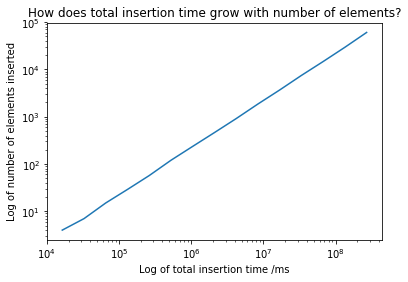

In [98]:
from matplotlib import pyplot as plt
from numpy import log, polyfit

chart, *_ = plt.loglog(sizes, insert_times)
slope, _ = polyfit(log(sizes), log(insert_times), 1)
print(f"The slope of this graph is {slope:.4f} (~1), indicating a linear relationship.")
plt.title("How does total insertion time grow with number of elements?")
plt.xlabel("Log of total insertion time /ms")
plt.ylabel("Log of number of elements inserted")
plt.show()

The slope of this graph is 1.0121 (~1), indicating a linear relationship.


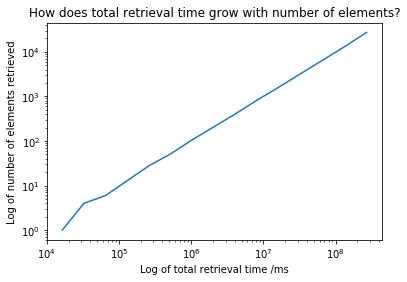

In [97]:
chart, *_ = plt.loglog(sizes, retrieve_times)
slope, _ = polyfit(log(sizes), log(retrieve_times), 1)
print(f"The slope of this graph is {slope:.4f} (~1), indicating a linear relationship.")
plt.title("How does total retrieval time grow with number of elements?")
plt.xlabel("Log of total retrieval time /ms")
plt.ylabel("Log of number of elements retrieved")
plt.show()

The slope of this graph is 0.9884 (~1), indicating a linear relationship.


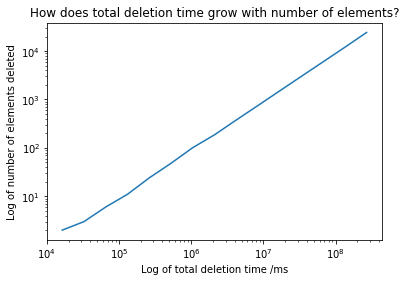

In [96]:
chart, *_ = plt.loglog(sizes, delete_times)
slope, _ = polyfit(log(sizes), log(delete_times), 1)
print(f"The slope of this graph is {slope:.4f} (~1), indicating a linear relationship.")
plt.title("How does total deletion time grow with number of elements?")
plt.xlabel("Log of total deletion time /ms")
plt.ylabel("Log of number of elements deleted")
plt.show()

# Amortized Complexities

Here I demonstrate that the amortized complexity of insertion, retrieval and deletion is O(1) (or in other words, does not grow meaningfully with the number of elements in the hashtable).

The slope of this graph is -0.0035 (~0), indicating a constant relationship.
The Y axis range here is effectively from 123ns to 335ns.
 (Faster == lower on the Y axis)


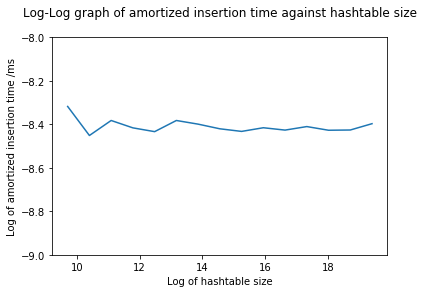

In [99]:
from numpy import exp
ylower, yupper = 9, 8

amortized_time = insert_times / sizes
slope, _ = polyfit(log(sizes), log(amortized_time), 1)
print(f"The slope of this graph is {slope:.4f} (~0), indicating a constant relationship.")
print(f"The Y axis range here is effectively from {exp(-ylower) * 10**6:.0f}ns to {exp(-yupper) * 10**6:.0f}ns.\n",
      "(Faster == lower on the Y axis)")
plt.plot(log(sizes), log(amortized_time))
plt.ylim(-ylower, -yupper)
plt.ylabel("Log of amortized insertion time /ms")
plt.xlabel("Log of hashtable size")
plt.title("Log-Log graph of amortized insertion time against hashtable size\n")
plt.show()

The slope of this graph is 0.0121 (~0), indicating a constant relationship.
The Y axis range here is effectively from 45ns to 335ns.
 (Faster == lower on the Y axis)


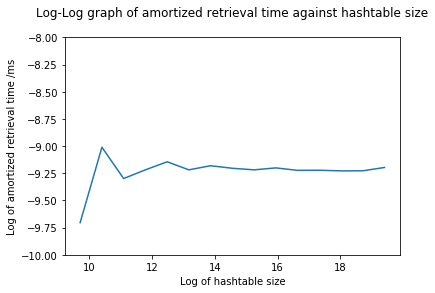

In [100]:
from numpy import exp
ylower, yupper = 10, 8

amortized_time = retrieve_times / sizes
slope, _ = polyfit(log(sizes), log(amortized_time), 1)
print(f"The slope of this graph is {slope:.4f} (~0), indicating a constant relationship.")
print(f"The Y axis range here is effectively from {exp(-ylower) * 10**6:.0f}ns to {exp(-yupper) * 10**6:.0f}ns.\n",
      "(Faster == lower on the Y axis)")
plt.plot(log(sizes), log(amortized_time))
plt.ylim(-ylower, -yupper)
plt.ylabel("Log of amortized retrieval time /ms")
plt.xlabel("Log of hashtable size")
plt.title("Log-Log graph of amortized retrieval time against hashtable size\n")
plt.show()

The slope of this graph is -0.0116 (~0), indicating a constant relationship.
The Y axis range here is effectively from 45ns to 335ns.
 (Faster == lower on the Y axis)


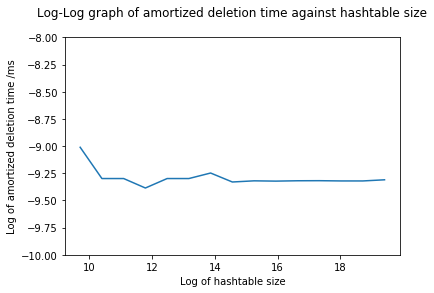

In [102]:
from numpy import exp
ylower, yupper = 10, 8

amortized_time = delete_times / sizes
slope, _ = polyfit(log(sizes), log(amortized_time), 1)
print(f"The slope of this graph is {slope:.4f} (~0), indicating a constant relationship.")
print(f"The Y axis range here is effectively from {exp(-ylower) * 10**6:.0f}ns to {exp(-yupper) * 10**6:.0f}ns.\n",
      "(Faster == lower on the Y axis)")
plt.plot(log(sizes), log(amortized_time))
plt.ylim(-ylower, -yupper)
plt.ylabel("Log of amortized deletion time /ms")
plt.xlabel("Log of hashtable size")
plt.title("Log-Log graph of amortized deletion time against hashtable size\n")
plt.show()